**Attribute Information:**

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds 
river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town 

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT = lower status of the population

MEDV Median value of owner-occupied homes in $1000's

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("/content/datasets_3537_5680_HousingData.csv")

In [49]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [51]:
df.shape

(506, 14)

In [52]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [0]:
df['CRIM'].fillna(df['CRIM'].mean(), axis = 0, inplace = True)
df['ZN'].fillna(df['ZN'].mean(), axis = 0, inplace = True)
df['INDUS'].fillna(df['INDUS'].mean(), axis = 0, inplace = True)
df['CHAS'].fillna(df['CHAS'].mean(), axis = 0, inplace = True)
df['AGE'].fillna(df['AGE'].mean(), axis = 0, inplace = True)
df['LSTAT'].fillna(df['LSTAT'].mean(), axis = 0, inplace = True)

In [54]:
df["INDUS"].shape

(506,)

In [55]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [56]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


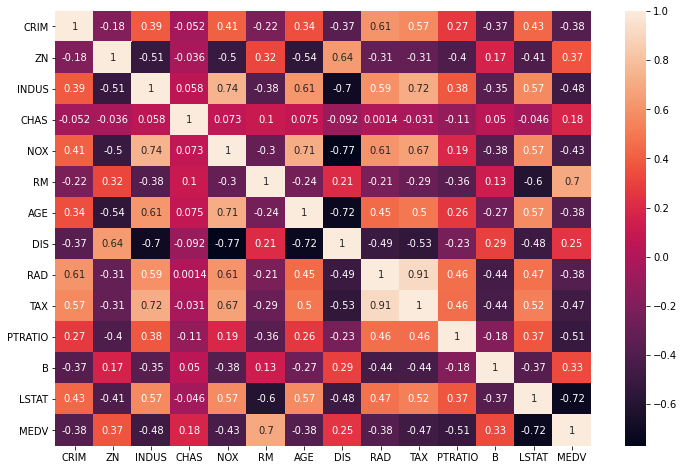

In [58]:
plt.figure(figsize= (12, 8))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [0]:
X = df.iloc[:, :13].values
y = df.iloc[:, -1].values

In [60]:
X.shape, y.shape

((506, 13), (506,))

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((430, 13), (76, 13), (430,), (76,))

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [0]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression()

In [66]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
ypred = reg.predict(X_test)

In [68]:
ypred

array([30.07318668, 25.01426957, 19.4526992 , 38.01363808, 20.26539893,
       22.53937504, 27.77034338, 30.38998734,  4.66620279, 25.22614561,
       24.45934364, 25.84503742, 21.73367132, 14.91116368, 16.27559986,
       18.21445434, 19.71059845, 20.65472041, 25.49942894, 31.2892899 ,
       33.12672493, 28.05299936, 23.83498172, 17.15861577, 16.82111401,
       31.1437796 , 34.63281262, 19.92570271, 35.10280521, 21.45868245,
       15.22367469, 10.69832834, 14.12873075, 24.0603667 , 17.44940696,
       19.51795416, 21.74631928, 16.90391693, 25.07779499, 22.64273656,
       16.37446926, 20.91231883, 17.49133049, 13.39715243, 21.55416185,
       15.96513185, 43.67253118, 31.96353719, 30.99201634, 18.08935929,
       22.6341172 , 12.55215245, 16.67738765, 35.88333334, 14.19224168,
       39.32188303,  9.48378761, 26.87581518, 22.37126183, 30.9949436 ,
       36.1817637 , 27.69715981, 20.42217856, 23.3052161 , 22.46095044,
       22.14196514, 30.73521993, 21.41018149, 14.25420779, 13.53

In [69]:
reg.score(X_train, y_train)

0.7500652510205605

In [70]:
reg.score(X_test, y_test)

0.6382956145922023

with reg

In [0]:
from sklearn.linear_model import Ridge, Lasso

In [87]:
reg1 = Lasso(alpha= 1)
reg1.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [88]:
reg1.score(X_train,y_train)

0.6744099129556678

In [89]:
reg1.score(X_test, y_test)

0.5633414141071342

In [108]:
reg2 = Ridge(alpha= 5)
reg2.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [109]:
reg2.score(X_train, y_train)

0.7498209712742613

In [110]:
reg2.score(X_test, y_test)

0.6364748449775143